In [10]:
import os

# Select the backend before importing folps.py
os.environ["FOLPS_BACKEND"] = "numpy"  #'numpy' or 'jax'

from folps_test_copy1 import *
from cosmo_class import *

In [11]:
%%time
#linear power spectrum
classy  = run_class(h = 0.6711, ombh2 = 0.022, omch2 = 0.122, omnuh2 = 0.0006442, 
                    As = 2e-9, ns = 0.965, z = 0.3, z_scale=[0.97],
                    N_ur = 2.0328,
                    khmin = 0.0001, khmax = 2.0, nbk = 1000, spectra = 'matter')
kwargs = {'z': 0.3}

CPU times: user 968 ms, sys: 15.4 ms, total: 983 ms
Wall time: 157 ms


In [12]:
matrix = MatrixCalculator(A_full=False)
mmatrices = matrix.get_mmatrices()

Loading matrices from matrices_nfftlog128_AfullFalse.npy


In [13]:
%%time
#1-loop
nonlinear = NonLinearPowerSpectrumCalculator(k=classy['k'], pklin=classy['pk'],
                                             mmatrices=mmatrices,
                                             kernels='eds',
                                             cosmo=classy['cosmo'],
                                             **kwargs)
table, table_now = nonlinear.calculate_loop_table()

CPU times: user 162 ms, sys: 13.2 ms, total: 176 ms
Wall time: 60.7 ms


In [14]:
# Bias parameters
b1 = 1.645
b2 = -0.46
bs2 = -4./7*(b1 - 1)
b3nl = 32./315*(b1 - 1)
# EFT parameters
alpha0 = 3                 #units: [Mpc/h]^2
alpha2 = -28.9             #units: [Mpc/h]^2
alpha4 = 0.0               #units: [Mpc/h]^2
ctilde = 0.0               #units: [Mpc/h]^4
# Stochatic parameters
PshotP = 1. / 0.0002118763
alphashot0 = 0.08
alphashot2 = -8.1          #units: [Mpc/h]^2
pars = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]
qpar, qper = 1., 1.


k = np.logspace(np.log10(0.01), np.log10(0.3), num=100) # array of  output k in [h/Mpc]

In [15]:
%%time
multipoles = RSDMultipolesPowerSpectrumCalculator(kobs=k, qpar=qpar, qper=qper, pars=pars,
                                                  table=table, table_now=table_now)
P0, P2, P4  = multipoles.get_rsd_pkell(kobs=k, qpar=qpar, qper=qper, pars=pars, table=table, table_now=table_now)

CPU times: user 3.65 ms, sys: 1.88 ms, total: 5.53 ms
Wall time: 3.92 ms


In [18]:
%%time
P0_noir, P2_noir  = multipoles.get_rsd_pkell(kobs=k, qpar=qpar, qper=qper, pars=pars, table=table, table_now=table_now, ells=(0, 2),IR_resummation=False)

CPU times: user 3.89 ms, sys: 2.25 ms, total: 6.14 ms
Wall time: 4.27 ms


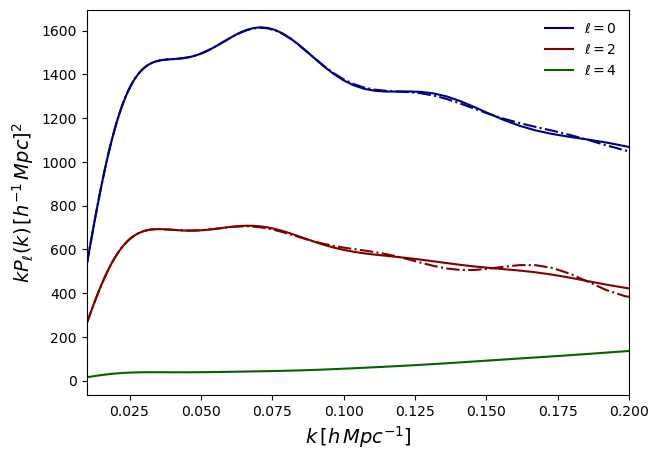

In [19]:
import matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$k P_{\ell}(k) \, [h^{-1} \,  Mpc]^2$', fontsize =  14)

axs.plot(k, k * P0, color = 'navy', ls='-', label=r'$\ell = 0$')
axs.plot(k, k * P0_noir, color = 'navy', ls='-.')

axs.plot(k, k * P2, color = 'maroon', ls='-', label=r'$\ell = 2$')
axs.plot(k, k * P2_noir, color = 'maroon', ls='-.')
axs.plot(k, k * P4, color = 'darkgreen', ls='-', label=r'$\ell = 4$')

axs.set_xlim([k[0], 0.2])
#axs.set_ylim([-200.0, 1800])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

In [20]:
np.array([P0, P2, P4])

array([[52858.11250104, 53563.87285761, 54240.45468954, 54885.2201314 ,
        55495.05748757, 56066.67832036, 56596.87443745, 57082.63289149,
        57521.21280968, 57909.7336396 , 58244.94611086, 58522.94416039,
        58740.27593613, 58894.19884868, 58981.80476978, 59000.36792813,
        58947.342639  , 58819.54517806, 58614.50909932, 58331.03454276,
        57967.57730944, 57522.73471476, 56995.63041217, 56386.17726521,
        55695.34239368, 54925.22097509, 54077.94106138, 53155.79329664,
        52161.37347545, 51098.59967213, 49973.4908603 , 48794.68789877,
        47570.44166368, 46308.76440579, 45017.66554403, 43704.3912277 ,
        42377.20657099, 41048.18695488, 39729.45313416, 38432.45920329,
        37167.49669854, 35942.81877479, 34764.98000157, 33640.04985751,
        32573.26010834, 31569.03055812, 30631.28695409, 29759.61345527,
        28949.02001214, 28194.25381155, 27487.60040213, 26818.11302048,
        26172.78650788, 25536.93465314, 24894.74634905, 24230.89

In [21]:
############################# Bispectrum ###############################3

In [22]:
classy  = run_class(h = 0.6711, ombh2 = 0.022, omch2 = 0.122, omnuh2 = 0.0006442, 
                    As = 2e-9, ns = 0.965, z = 0.3, z_scale=[0.97],
                    N_ur = 2.0328,
                    khmin = 0.0001, khmax = 2.0, nbk = 1000, spectra = 'matter')

In [23]:
#pars for Bispectrum
z_pk=0.0;


b1v = 1;
c1v = 0; b2v = 0.0; bsv = 0;

Omv=classy['cosmo'].Omega0_m();
hv=classy['cosmo'].h(); 
f=classy['cosmo'].scale_independent_growth_factor_f(z_pk)

qparv = 1; qperpv = 1;
Bshotv=0.0
Pshotv=0.0


bisp_nuis_paramsv=[b1v,b2v,bsv,c1v,Bshotv,Pshotv]
bisp_cosmo_paramsv=[Omv, hv, nonlinear.f0]

In [24]:
ks = np.logspace(np.log10(0.0001), np.log10(0.4), 30)
k1k2T = np.vstack([ks,ks]).T

In [25]:
%%time
#precision=[8,10,10]
B000,B202=Bisp_Sugiyama(bisp_cosmo_paramsv, bisp_nuis_paramsv, pk_input=nonlinear.inputpkT, z_pk=z_pk, k1k2pairs=k1k2T, Omfid=-1,qpar=1,qperp=1)#,precision=precision)

1 1
0.6880638641959066
CPU times: user 85.3 ms, sys: 7.75 ms, total: 93.1 ms
Wall time: 91.5 ms


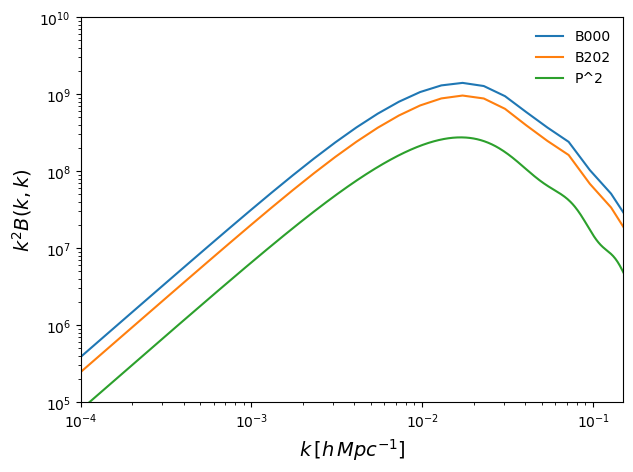

In [26]:
fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$k^2 B(k,k) $', fontsize =  14)

#axs.plot(k1k2T.T[0], k1k2T.T[0]*k1k2T.T[0]*B000, ls='-', label='B000')
#axs.plot(k1k2T.T[0],k1k2T.T[0]*k1k2T.T[0]*B202, ls='-', label='B202')


axs.loglog(k1k2T.T[0],B000, ls='-', label='B000')
axs.loglog(k1k2T.T[0],B202, ls='-', label='B202')
axs.loglog(nonlinear.inputpkT[0],nonlinear.inputpkT[1]*nonlinear.inputpkT[1], ls='-', label='P^2')



axs.set_xlim([0.0001,0.15])
axs.set_ylim([1e5, 1e10])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()